In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib ipympl

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (13,6)

In [7]:
import soundfile as sf
import os
import tempfile
import platform

if platform.system()=='Darwin': #MAC 
    import sounddevice as sd

def play(y,Fe=16000):
    z=np.real(y)/(abs(np.real(y)).max())
    if platform.system()=='Darwin': #MAC (sous linux sounddevice a un comportement erratique)
        sd.play(z,Fe)
        return
    fichier=tempfile.mktemp()+'SON_TP.wav'
    sec=len(y)/Fe
    if sec<=20:
        rep=True
    if sec>20:
        print ('Vous allez créer un fichier son de plus de 20 secondes.')
        rep=None
        while rep is None:
            x=input('Voulez-vous continuer? (o/n)')
            if x=='o':
                rep=True
            if x=='n':
                rep=False
            if rep is None:
                print ('Répondre par o ou n, merci. ')
    if rep:
        sf.write(fichier,z,Fe)
        os.system(''+fichier+' &')

In [5]:
import torch
from torch.utils.data import Dataset, Subset
import os
import numpy as np


class TechnoDataset(Dataset):

    def __init__(self,
                 dat_location,
                 size=2**15) -> None:
        super().__init__()

        self.samples = np.memmap(
            dat_location,
            dtype="float32",
            mode="r",
        )
        self.samples = self.samples[:size * (len(self.samples) // size)]
        self.samples = self.samples.reshape(-1, 1, size)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        return torch.from_numpy(np.copy(self.samples[index])).float()

dataset = TechnoDataset("techno_resampled.dat")
Fe = 16000 #Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.9138751059770585, 0.9483274847269059)

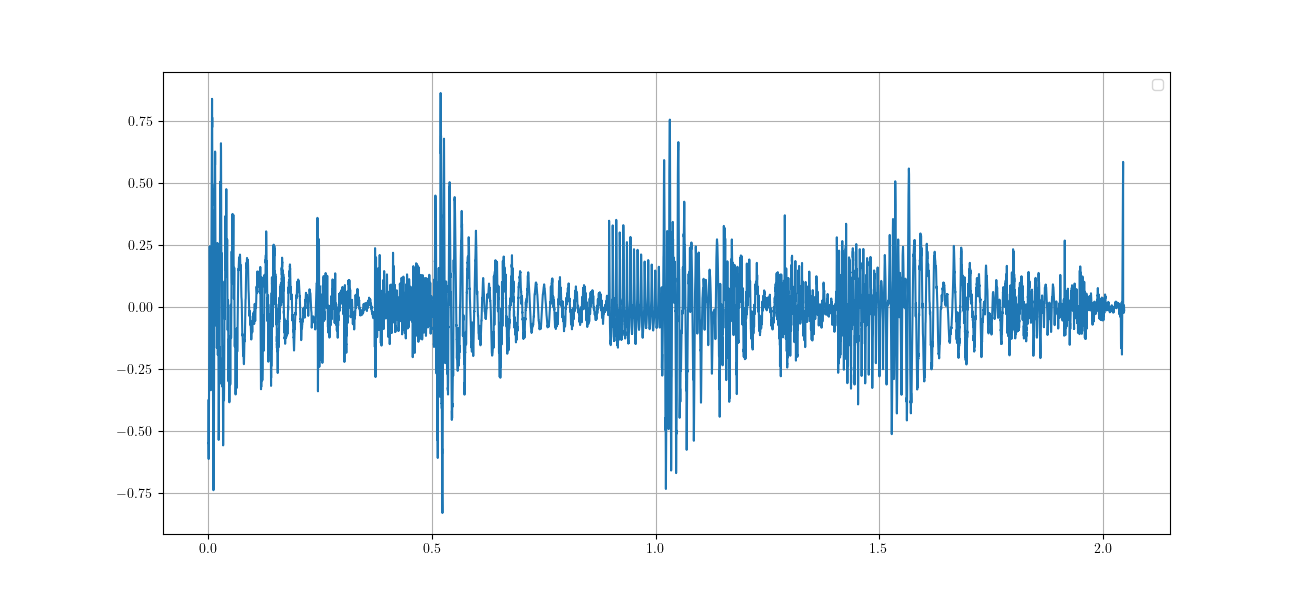

In [10]:
time = np.arange(len(dataset[1].T))/Fe

plt.figure()
plt.plot(time,dataset[1].T,label="")
plt.grid()
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.title(r"")
plt.xlim()
plt.ylim()

In [34]:
play(dataset[5].T,Fe)